# python analysis of Naperville Vendor Payments and Vendor List

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vp_path = '/home/mike-rob/Development/Analytic_Dev/data/Vendor_Payments.csv'
vl_path = '/home/mike-rob/Development/Analytic_Dev/data/Vendor_List.csv'

vp_df = pd.read_csv(vp_path)
vl_df = pd.read_csv(vl_path)

### Vendor Payments Init Discovery

In [4]:
df = vp_df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130456 entries, 0 to 130455
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fiscal_Year             130456 non-null  int64  
 1   Fiscal_Period           130456 non-null  int64  
 2   Invoice_Status          130456 non-null  object 
 3   Vendor_ID               130456 non-null  int64  
 4   Vendor_Name             130456 non-null  object 
 5   Check_Number            130456 non-null  int64  
 6   Payment_Amount          130456 non-null  float64
 7   Check_Date              130456 non-null  object 
 8   Invoice_Number          130456 non-null  int64  
 9   invoice_date            130456 non-null  object 
 10  Line_Item_Desc          130456 non-null  object 
 11  Purch_Order_No          130456 non-null  object 
 12  Org_Code                130456 non-null  int64  
 13  Org_Description         130456 non-null  object 
 14  Object_Code         

In [5]:
df.isnull().sum()

Fiscal_Year                    0
Fiscal_Period                  0
Invoice_Status                 0
Vendor_ID                      0
Vendor_Name                    0
Check_Number                   0
Payment_Amount                 0
Check_Date                     0
Invoice_Number                 0
invoice_date                   0
Line_Item_Desc                 0
Purch_Order_No                 0
Org_Code                       0
Org_Description                0
Object_Code                    0
Object_Description             0
Payment_Type                   0
Payment_Status                 0
Fund_Code                      0
Fund                           0
Function_Code                  0
Function_                      0
Department_Code                0
Department                130456
Division_Code                  0
Division                       0
Payment_ID                     0
Department_No                  0
Department_Description    130456
OBJECTID                       0
dtype: int

In [6]:
df.describe()

,Fiscal_Year,Fiscal_Period,Vendor_ID,Check_Number,Payment_Amount,Invoice_Number,Org_Code,Object_Code,Fund_Code,Function_Code,Department_Code,Department,Division_Code,Department_Description,OBJECTID
count,130456.000000,130456.000000,130456.000000,1.304560e+05,1.304560e+05,130456.000000,1.304560e+05,130456.000000,130456.000000,130456.000000,130456.000000,0.0,130456.000000,0.0,130456.000000
mean,2022.344384,6.535660,308268.486310,5.258877e+05,1.073241e+04,170753.892378,2.631508e+07,461665.958101,170.257290,181.575780,26.140270,NaN,89.155646,NaN,65228.500000
std,1.052225,3.320996,456007.792071,1.329748e+06,1.265707e+05,36493.458927,1.674796e+07,159526.088116,138.624919,180.329615,16.664703,NaN,45.899728,NaN,37659.547696
min,2021.000000,1.000000,1.000000,0.000000e+00,-3.520000e+06,28598.000000,1.100000e+03,100000.000000,110.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000
25%,2021.000000,4.000000,1177.000000,0.000000e+00,6.963750e+01,139159.750000,1.510110e+07,531302.000000,110.000000,100.000000,15.000000,NaN,100.000000,NaN,32614.750000
50%,2022.000000,6.000000,13458.000000,4.031400e+04,2.080350e+02,170750.500000,3.125110e+07,532317.000000,130.000000,110.000000,31.000000,NaN,100.000000,NaN,65228.500000
75%,2023.000000,9.000000,999997.000000,6.938420e+05,8.992675e+02,202362.250000,4.025130e+07,541407.000000,140.000000,210.000000,40.000000,NaN,115.000000,NaN,97842.250000
max,2024.000000,12.000000,999999.000000,9.011126e+07,6.919082e+06,233823.000000,8.010270e+07,920000.000000,902.000000,700.000000,80.000000,NaN,135.000000,NaN,130456.000000


In [ ]:
df.nunique()

Fiscal_Year                    4
Fiscal_Period                 12
Invoice_Status                 3
Vendor_ID                   2191
Vendor_Name                 2179
Check_Number               58025
Payment_Amount             57700
Check_Date                  1030
Invoice_Number            119862
invoice_date                   1
Line_Item_Desc             43746
Purch_Order_No                 1
Org_Code                     196
Org_Description              196
Object_Code                  189
Object_Description           183
Payment_Type                   1
Payment_Status                 1
Fund_Code                     30
Fund                          30
Function_Code                 12
Function_                     12
Department_Code               19
Department                     0
Division_Code                 32
Division                      32
Payment_ID                     1
Department_No                  1
Department_Description         0
OBJECTID                  130456
dtype: int

In [8]:
df.duplicated().sum()

np.int64(0)

In [ ]:
int_cols = df.select_dtypes(include=["int64","float"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print(f"int and float columns: {int_cols}")
print(f"obj columns: {cat_cols}")

# print(type(int_cols))

int and float columns: Index(['Fiscal_Year', 'Fiscal_Period', 'Vendor_ID', 'Check_Number',
       'Payment_Amount', 'Invoice_Number', 'Org_Code', 'Object_Code',
       'Fund_Code', 'Function_Code', 'Department_Code', 'Department',
       'Division_Code', 'Department_Description', 'OBJECTID'],
      dtype='object')
obj columns: Index(['Invoice_Status', 'Vendor_Name', 'Check_Date', 'invoice_date',
       'Line_Item_Desc', 'Purch_Order_No', 'Org_Description',
       'Object_Description', 'Payment_Type', 'Payment_Status', 'Fund',
       'Function_', 'Division', 'Payment_ID', 'Department_No'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


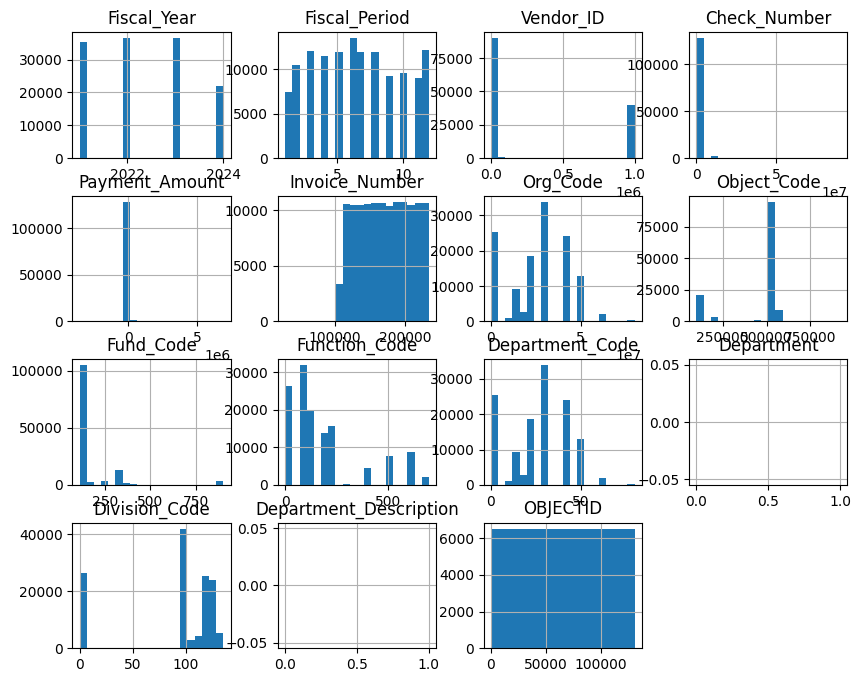

In [12]:
df[int_cols].hist(figsize=(10,8), bins=20)
plt.show()

In [13]:
for col in cat_cols:
    print(df[col].value_counts())

Invoice_Status
Paid        129323
Void          1113
Approved        20
Name: count, dtype: int64
Vendor_Name
ONE-TIME PAY-UTILITIES REFUND              18704
ONE-TIME PAY-PC CARD VENDOR                12769
AMAZON.COM LLC                              6262
MENARD INC                                  3744
ONE-TIME EMPLOYEE PAY VENDOR                3691
                                           ...  
GOLF MILL MOTOR SALES INC                      1
JAMES L LORD INC                               1
SUPER DUTY TRUCK PARTS LLC                     1
BARCODES ACQUISITION INC                       1
CIVIL AND ENVIRONMENTAL CONSULTANTS INC        1
Name: count, Length: 2179, dtype: int64
Check_Date
2023/12/31 00:00:00+00    1083
2022/12/31 00:00:00+00     934
2021/12/31 00:00:00+00     623
2021/10/11 00:00:00+00     604
2021/09/02 00:00:00+00     515
                          ... 
2024/05/04 00:00:00+00       1
2022/11/25 00:00:00+00       1
2022/11/27 00:00:00+00       1
2022/12/23 00:00:00+0

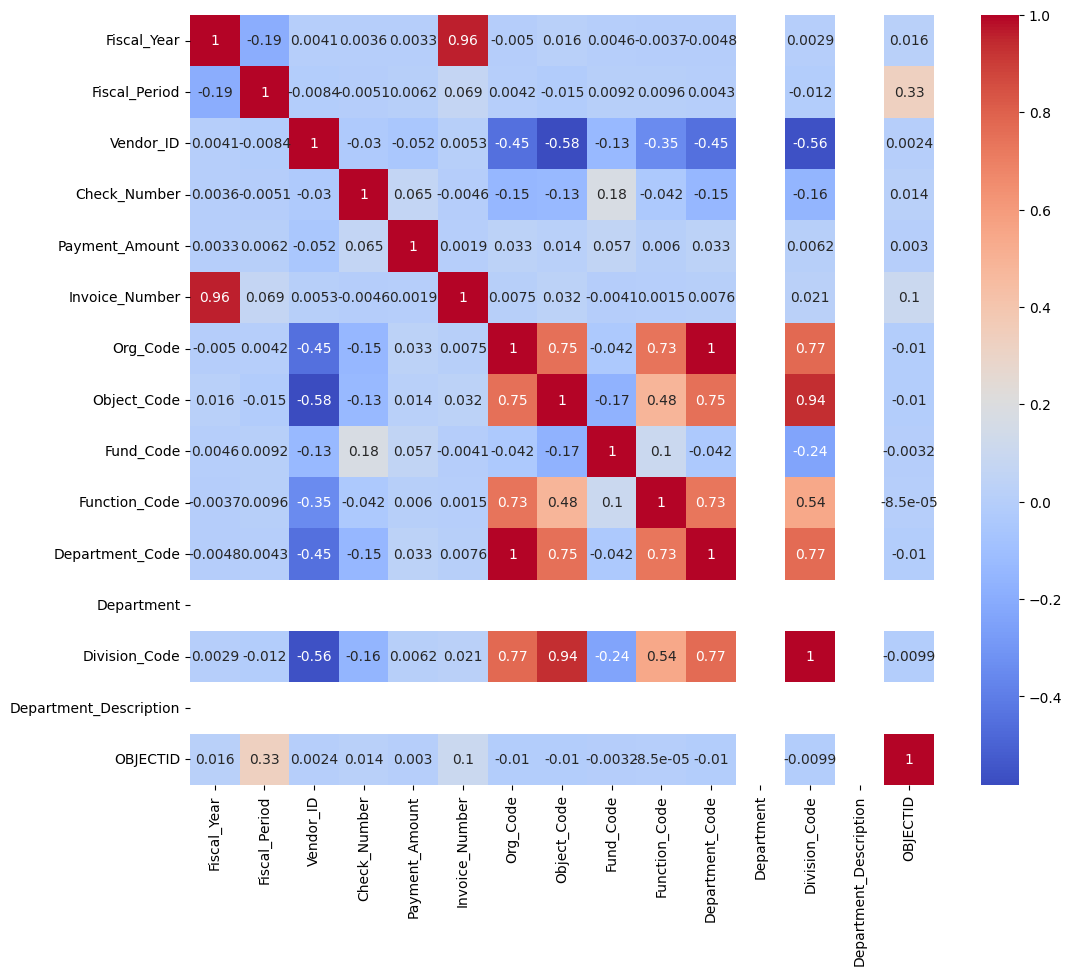

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df[int_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

In [23]:
cols_missing_data = df.columns[df.isna().any()]
df_missing = df[cols_missing_data]
df_missing.dropna()


,Department,Department_Description


these columns have no data in them

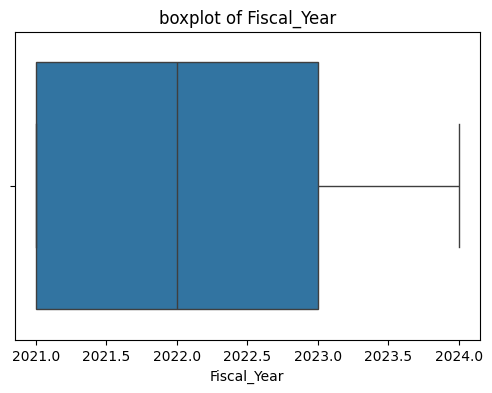

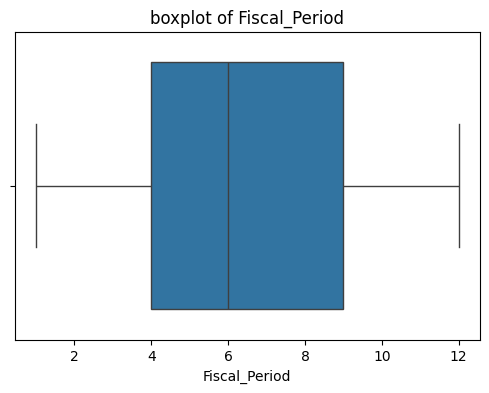

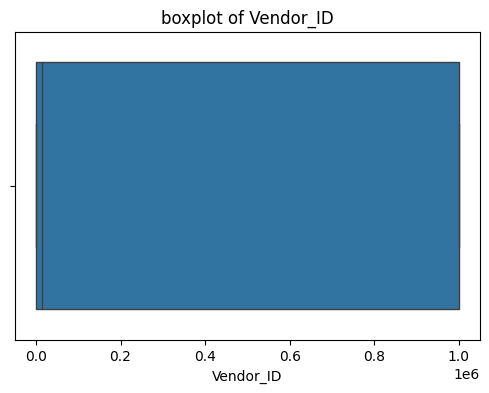

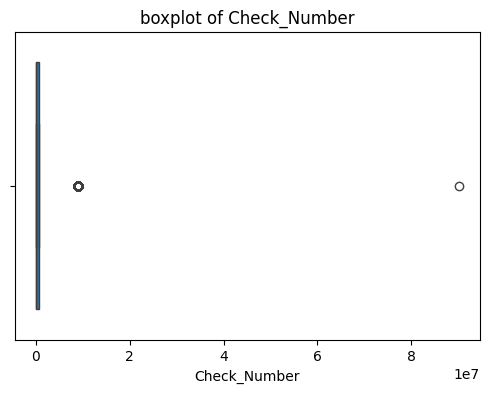

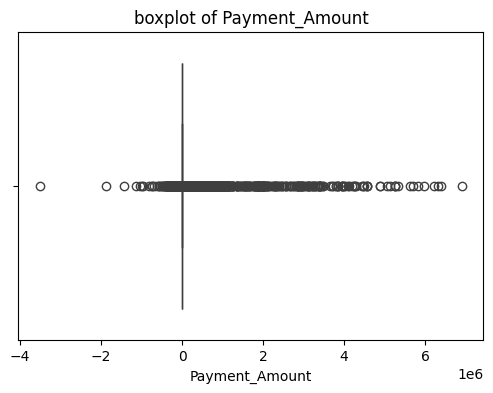

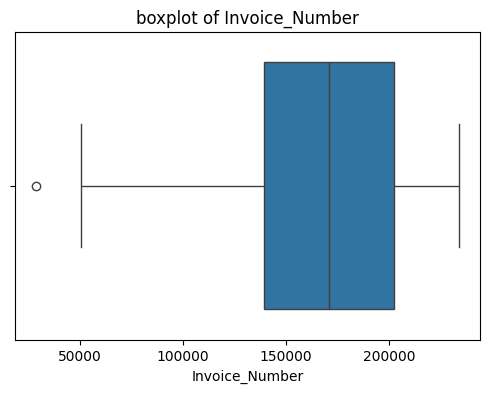

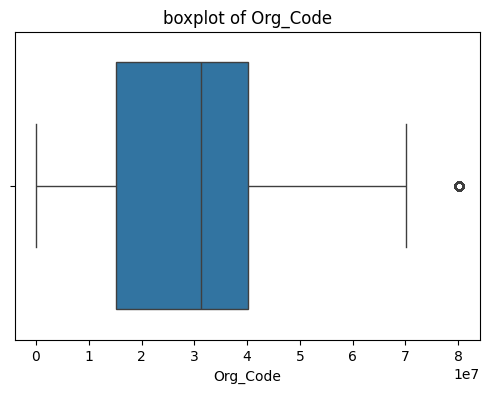

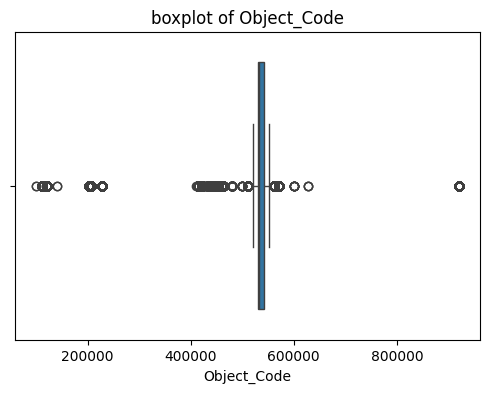

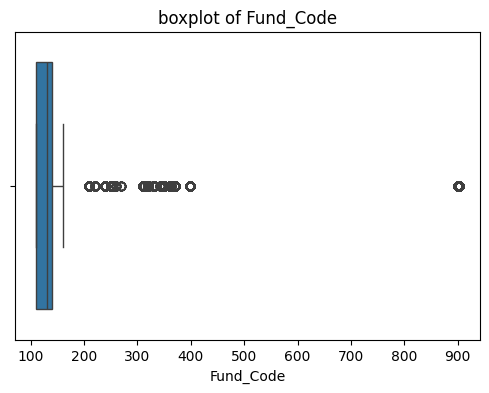

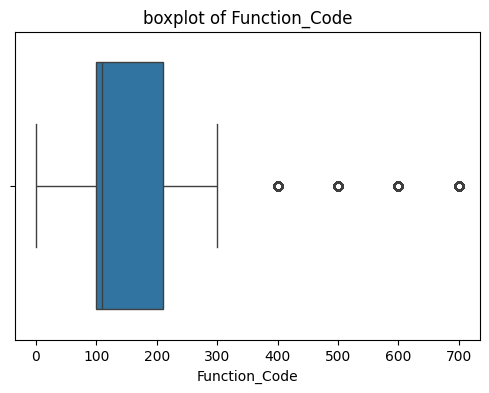

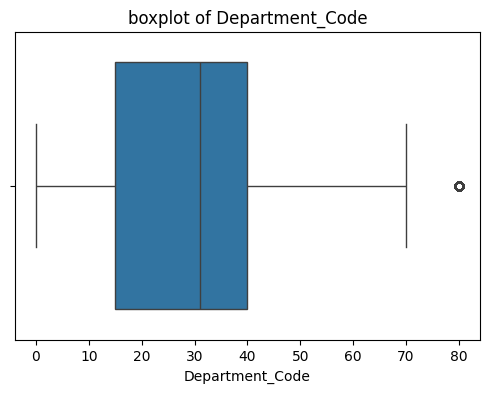

ValueError: List of boxplot statistics and `positions` values must have same the length

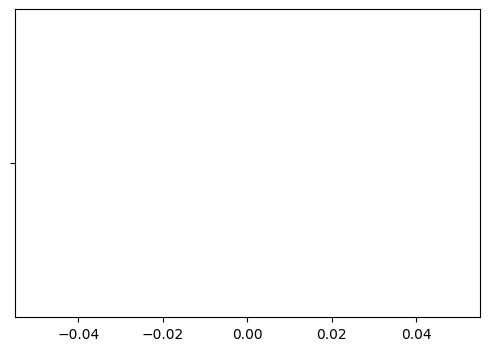

In [24]:
for col in int_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"boxplot of {col}")
    plt.show()